# Machine Learning Challenge 1: The Mysterious Machine.

In [34]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# set the figsize
plt.rcParams['figure.figsize'] = (12, 8)

In [35]:
# import the Data
train_path = '/Users/abdelbastnassiri/Desktop/master studies/ML Challenges/data_train_db.csv'
test_path = '/Users/abdelbastnassiri/Desktop/master studies/ML Challenges/data_test_db.csv'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
# set the figsize
plt.rcParams['figure.figsize'] = (12, 8)


In [36]:
train_data.head()

,Running,Blue Switch On,Battery level,Humidity,Magnetic field,Controller beige,Controller bisque,Controller black,Controller blanchedalmond,Time since restart,...,Waste level right tank,Waste level left tank,Helium reservoir,alpha-radiation,Active motion supression,Blade density,Blade rotation,Controller mintcream,Controller mistyrose,Controller moccasin
0,0.0,0.0,2.692187,0.823990,2.242929,2.695297,3.933090,2.502372,2.321909,2.583421,...,3.397535,1.326508,3.127791,3.107910,2.788900,1.367731,2.537494,3.079726,2.212923,0.937677
1,0.0,1.0,0.802161,2.107391,2.214442,1.943448,2.255887,0.990679,2.821858,1.852239,...,3.272434,3.355175,3.535267,1.734454,2.755193,3.854951,1.313079,2.678908,2.077354,2.489960
2,0.0,0.0,2.493600,3.629275,3.753934,0.780637,0.733754,1.480998,1.949244,3.877984,...,0.619117,2.485713,3.333775,2.336371,3.644053,1.141417,1.630118,1.335208,1.250015,2.450047
3,0.0,0.0,1.017163,2.869248,3.690027,3.005117,2.299692,0.946617,2.995687,1.085925,...,2.598031,3.897911,0.768569,2.455665,2.150425,3.297637,2.299281,1.918512,2.603726,2.186401
4,0.0,0.0,3.261586,3.748870,1.113921,2.773130,2.685831,2.922470,2.782150,2.843437,...,2.721044,0.977158,1.459175,3.278020,2.141349,2.946446,3.794392,3.790550,1.527006,0.784453


In [37]:
train_data.describe()

,Running,Blue Switch On,Battery level,Humidity,Magnetic field,Controller beige,Controller bisque,Controller black,Controller blanchedalmond,Time since restart,...,Waste level right tank,Waste level left tank,Helium reservoir,alpha-radiation,Active motion supression,Blade density,Blade rotation,Controller mintcream,Controller mistyrose,Controller moccasin
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.25200,0.569309,2.245700,2.245582,2.286042,2.301357,2.360237,2.308765,2.321390,2.291682,...,2.264328,2.461778,2.333640,2.312610,2.271570,2.358776,2.431892,2.270909,2.406573,2.290075
std,0.43427,2.064471,2.066229,2.070938,2.088406,2.870230,2.186569,1.960638,2.133081,2.303516,...,1.603160,2.765908,2.313297,2.197625,2.407498,1.868910,3.354629,2.905279,2.655580,2.200619
min,0.00000,-38.912223,-49.567608,-48.025486,-50.625713,-64.332797,-25.856986,-25.352629,-41.947875,-22.811861,...,-28.829231,-13.744140,-33.408316,-33.014783,-60.939636,-20.190632,-41.431244,-49.426931,-38.547815,-25.706284
25%,0.00000,0.000000,1.455497,1.450780,1.396234,1.448612,1.424586,1.411904,1.426768,1.424372,...,1.419621,1.508474,1.410000,1.420994,1.416664,1.392657,1.457714,1.480437,1.468155,1.359178
50%,0.00000,1.000000,2.312707,2.276670,2.284196,2.309741,2.280247,2.272711,2.313238,2.234109,...,2.285164,2.366651,2.258610,2.332180,2.271628,2.286507,2.332647,2.226324,2.277924,2.248171
75%,1.00000,1.000000,3.120572,3.148088,3.116216,3.149999,3.117483,3.120073,3.138719,3.088444,...,3.116475,3.179161,3.128606,3.201663,3.124524,3.193710,3.188393,3.094970,3.235950,3.098108
max,1.00000,51.284360,39.627726,32.656512,41.665749,63.277631,50.581393,53.323887,48.002962,57.100806,...,35.797162,83.270405,57.160376,59.421455,35.448563,40.070818,83.938538,69.785875,51.599303,59.970443


# Data Cleaning.

In [38]:
# Null values
train_data.isnull().sum()

Running                 0
Blue Switch On          0
Battery level           0
Humidity                0
Magnetic field          0
                       ..
Blade density           0
Blade rotation          0
Controller mintcream    0
Controller mistyrose    0
Controller moccasin     0
Length: 100, dtype: int64

Some Statistics of the data.

Text(0.5, 1.0, 'Min')

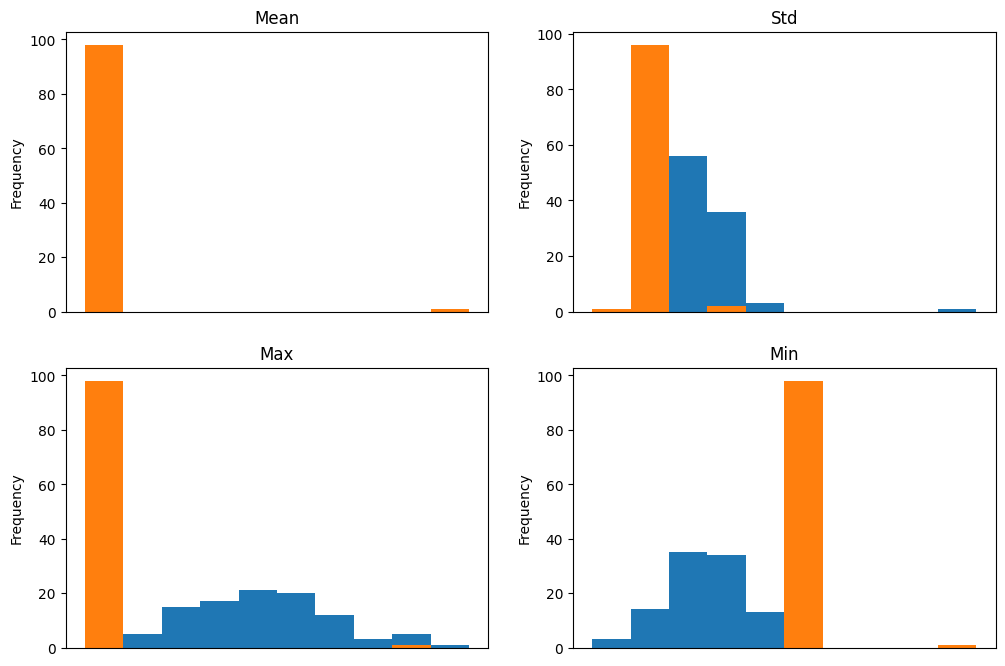

In [39]:
fig, [ax1, ax2] = plt.subplots(2,2)
train_data.groupby('Running').mean().T.plot.hist(ax = ax1[0], legend = False, xticks = [])
ax1[0].set_title('Mean')
train_data.groupby('Running').std().T.plot.hist(ax = ax1[1], legend = False, xticks = [])
ax1[1].set_title('Std')
train_data.groupby('Running').max().T.plot.hist(ax = ax2[0], legend = False, xticks = [])
ax2[0].set_title('Max')
train_data.groupby('Running').min().T.plot.hist(ax = ax2[1], legend = False, xticks = [])
ax2[1].set_title('Min')

The min and max of some columns are bit to worry about, this indicates the existence of outliers. We need to identify them and remove them.

In [40]:
# get the Binary data and clean them.
Binary = [col for col in train_data.columns if \
    (train_data[col].value_counts().values[0] + train_data[col].value_counts().values[1])/train_data.shape[0] > 0.9]
# this returns columns with the first two lables being more than 90% of the data.
for col in Binary:
    train_data.drop(index = train_data[(train_data[col] != 0) & (train_data[col] != 1)].index, inplace = True)

Text(0.5, 1.0, 'Min')

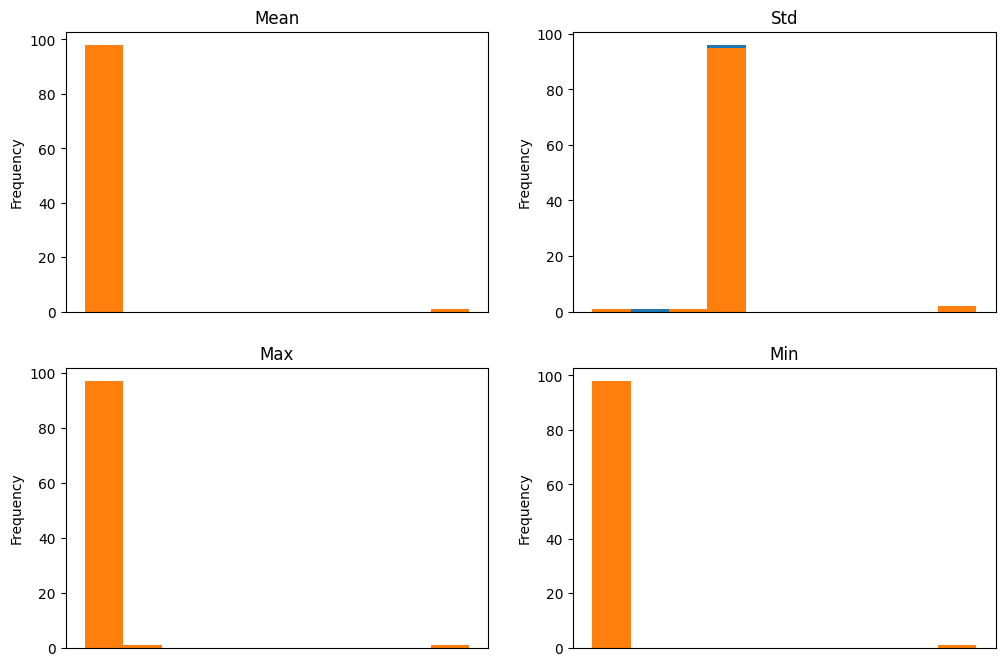

In [41]:
fig, [ax1, ax2] = plt.subplots(2,2)
train_data.groupby('Running').mean().T.plot.hist(ax = ax1[0], legend = False, xticks = [])
ax1[0].set_title('Mean')
train_data.groupby('Running').std().T.plot.hist(ax = ax1[1], legend = False, xticks = [])
ax1[1].set_title('Std')
train_data.groupby('Running').max().T.plot.hist(ax = ax2[0], legend = False, xticks = [])
ax2[0].set_title('Max')
train_data.groupby('Running').min().T.plot.hist(ax = ax2[1], legend = False, xticks = [])
ax2[1].set_title('Min')

The distribution of labels.

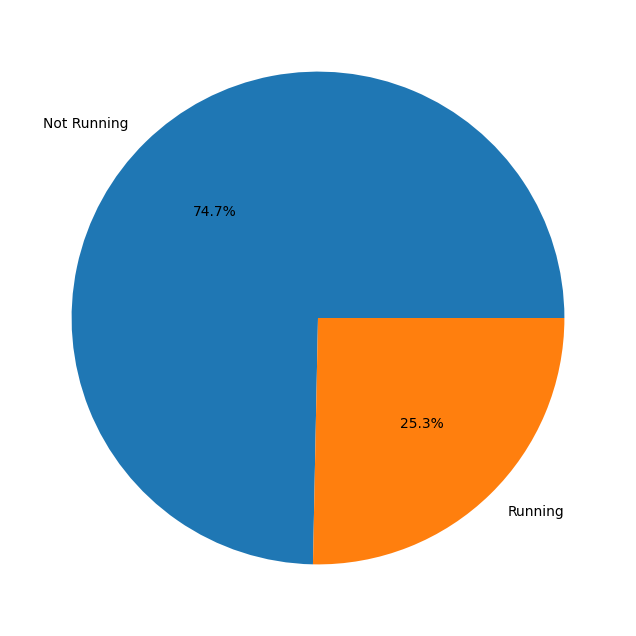

In [42]:
plt.pie(x = train_data['Running'].value_counts(), labels = ['Not Running', 'Running'],
        autopct='%0.1f%%')
plt.show()

We see that the data is imbalanced, tp avoid having a baised model that performes well on the first label and badly on the second one, we are going to balance the data by overestimation. 

In [43]:
# we are going to use SMOTE for this purpose.
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(train_data.drop(columns = ['Running']), train_data['Running'])
new_df = pd.concat([y, X], axis = 1)

In [44]:
new_df.describe()

,Running,Blue Switch On,Battery level,Humidity,Magnetic field,Controller beige,Controller bisque,Controller black,Controller blanchedalmond,Time since restart,...,Waste level right tank,Waste level left tank,Helium reservoir,alpha-radiation,Active motion supression,Blade density,Blade rotation,Controller mintcream,Controller mistyrose,Controller moccasin
count,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,...,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000
mean,0.500000,0.721736,2.195682,2.330267,2.305733,2.342966,2.273285,2.317888,2.272080,2.282596,...,2.256580,2.315288,2.281878,2.328074,2.281003,2.286643,2.300202,2.275231,2.339264,2.241831
std,0.500084,0.448219,0.935689,0.945095,0.934901,0.904709,0.921859,0.934682,0.939468,0.936802,...,0.915468,0.921903,0.953257,0.944043,0.947300,0.964987,0.920463,0.908894,0.946264,0.935210
min,0.000000,0.000000,0.602610,0.600904,0.600897,0.600831,0.601046,0.601994,0.601012,0.603248,...,0.602265,0.600337,0.601731,0.600710,0.603343,0.601152,0.602343,0.600539,0.602446,0.602053
25%,0.000000,0.000000,1.379552,1.553951,1.496245,1.604919,1.513735,1.514536,1.453443,1.499917,...,1.492036,1.528157,1.458969,1.509633,1.454398,1.469496,1.545155,1.544807,1.550047,1.467573
50%,0.500000,1.000000,2.141782,2.358197,2.310805,2.366698,2.270908,2.337830,2.251250,2.261920,...,2.229567,2.329155,2.265617,2.345553,2.257554,2.286507,2.300872,2.233332,2.321331,2.241208
75%,1.000000,1.000000,2.982466,3.143147,3.066310,3.082907,3.024468,3.089126,3.050434,3.047203,...,2.987730,3.082724,3.085687,3.128989,3.061630,3.135022,3.065005,3.033901,3.155338,3.001752
max,1.000000,1.000000,3.999982,3.997223,3.999450,3.997824,3.993669,3.999399,3.998886,3.995205,...,3.996400,3.998191,3.998078,3.999597,3.998812,3.999253,3.999750,3.999669,3.998005,3.997672


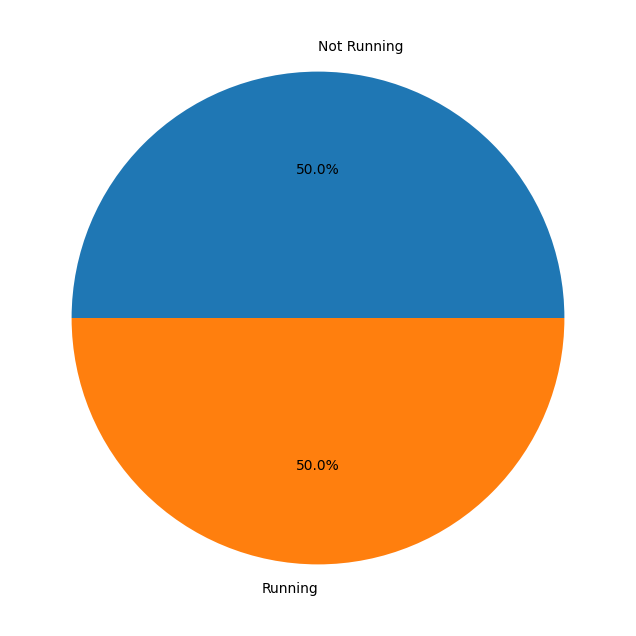

In [45]:

plt.pie(x = new_df['Running'].value_counts(), labels = ['Not Running', 'Running'],
        autopct='%0.1f%%')
plt.show()


In [46]:
# the size of our new data
new_df.shape

(2972, 100)

Now let's take a look at the correlation matrix.

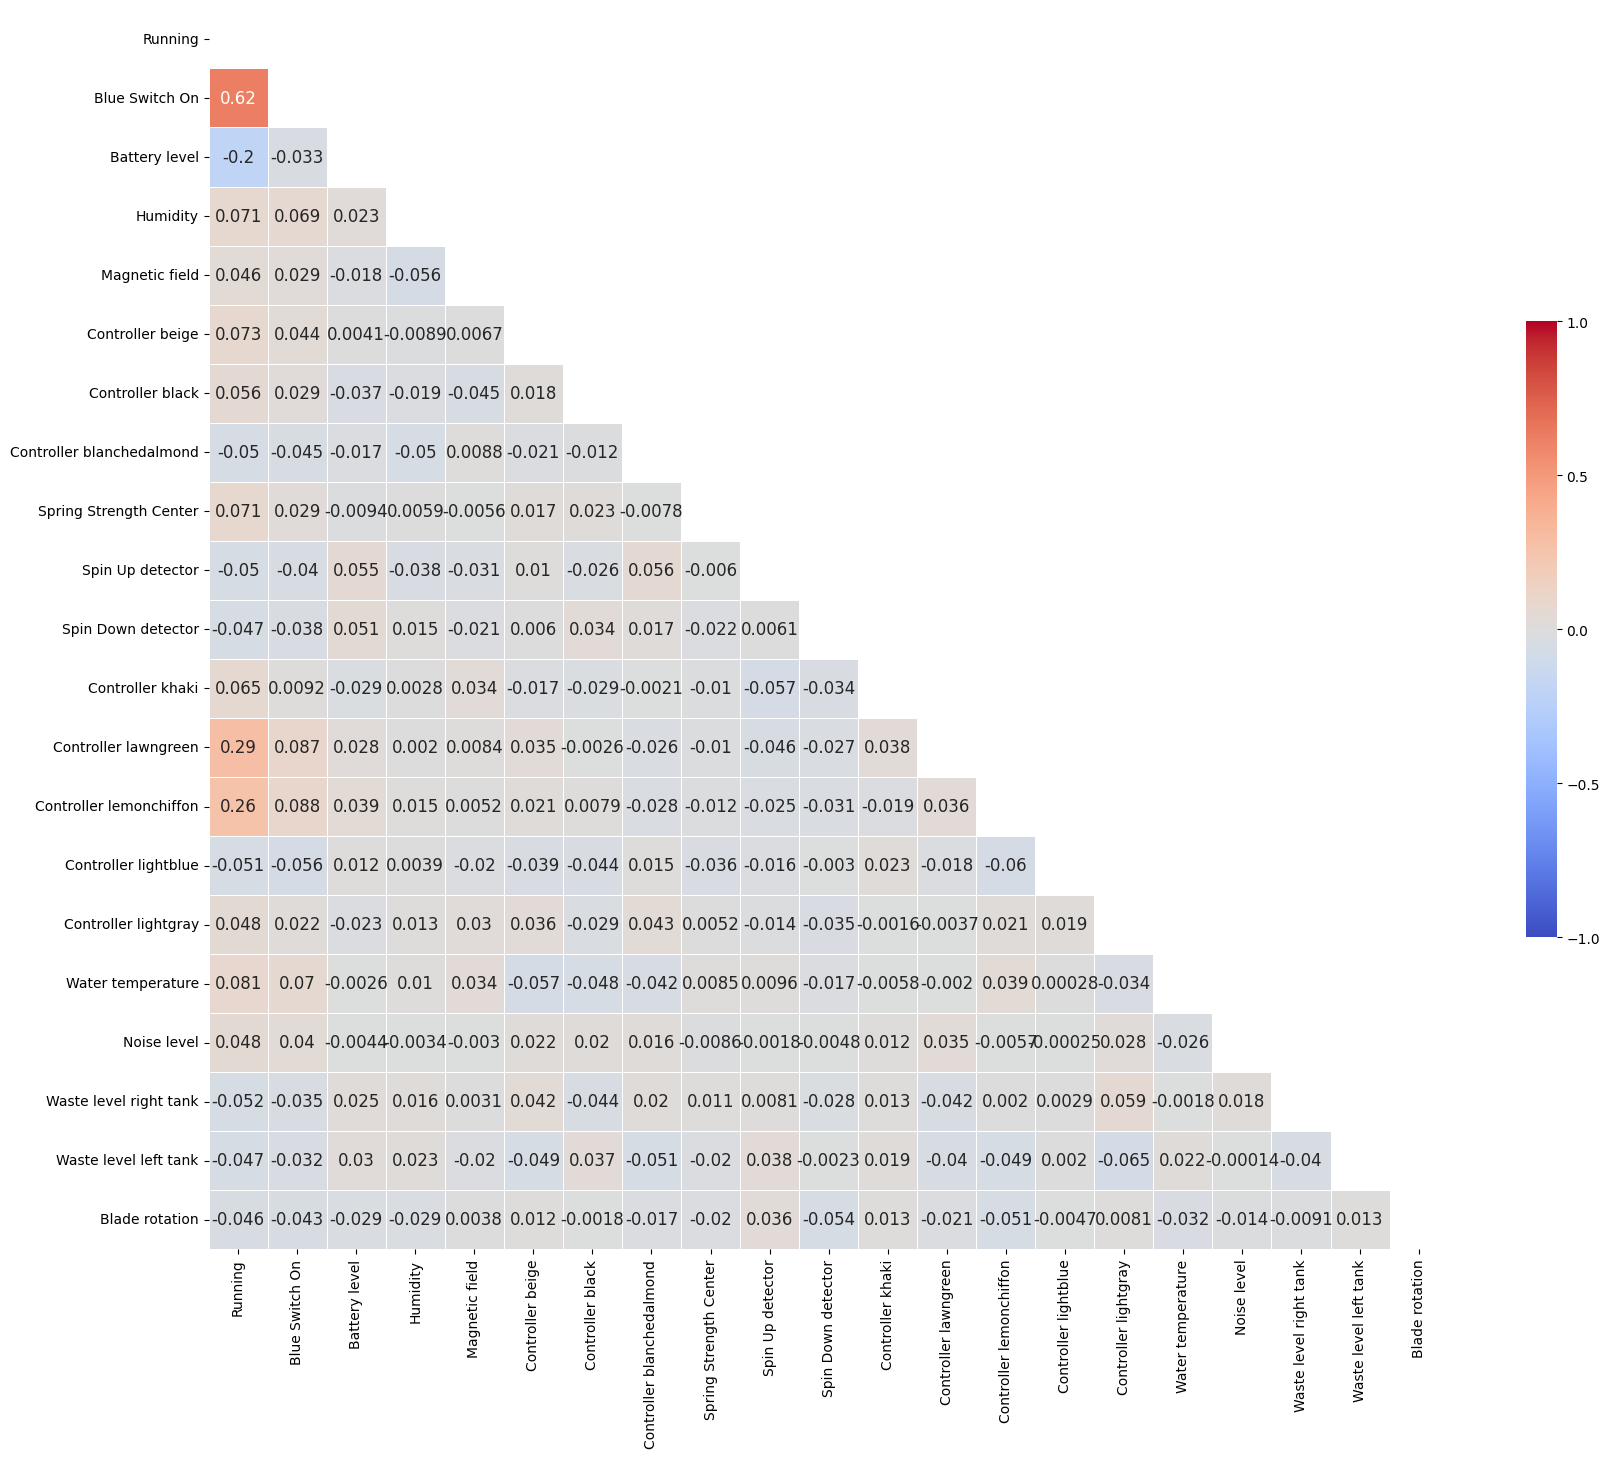

In [47]:
Corr = new_df.corr(method = 'pearson')
# take only the 'highly' correlated features with the target
Corr.drop(index = Corr[(Corr['Running'] < 0.045) & (Corr['Running'] > -0.045)].index, inplace = True)
Corr = Corr[Corr.index]
mask = np.zeros_like(Corr, dtype = bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(20,20)) 
heatmap = sns.heatmap(Corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
ax.set_yticklabels(Corr.columns, rotation = 0)
ax.set_xticklabels(Corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

<AxesSubplot: >

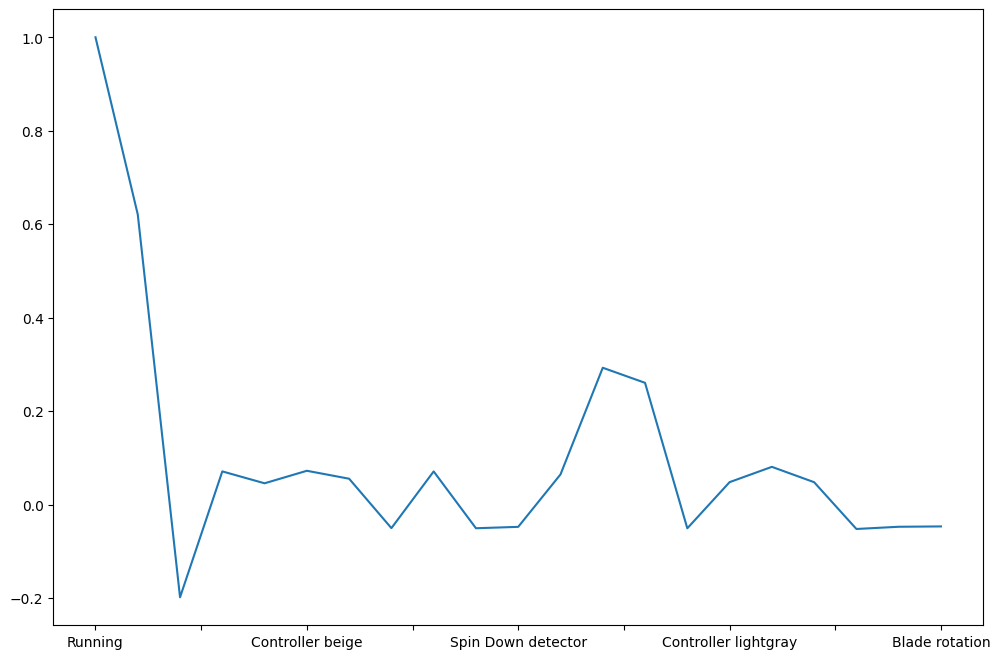

In [48]:
Corr['Running'].plot()

We notice that our target feature has high correlation with three features: 'Blue Switch On', 'Controller lawngreen' and 'Controller lemonchiffon'.

We are going to analyse them separately.

<AxesSubplot: xlabel='Blue Switch On', ylabel='count'>

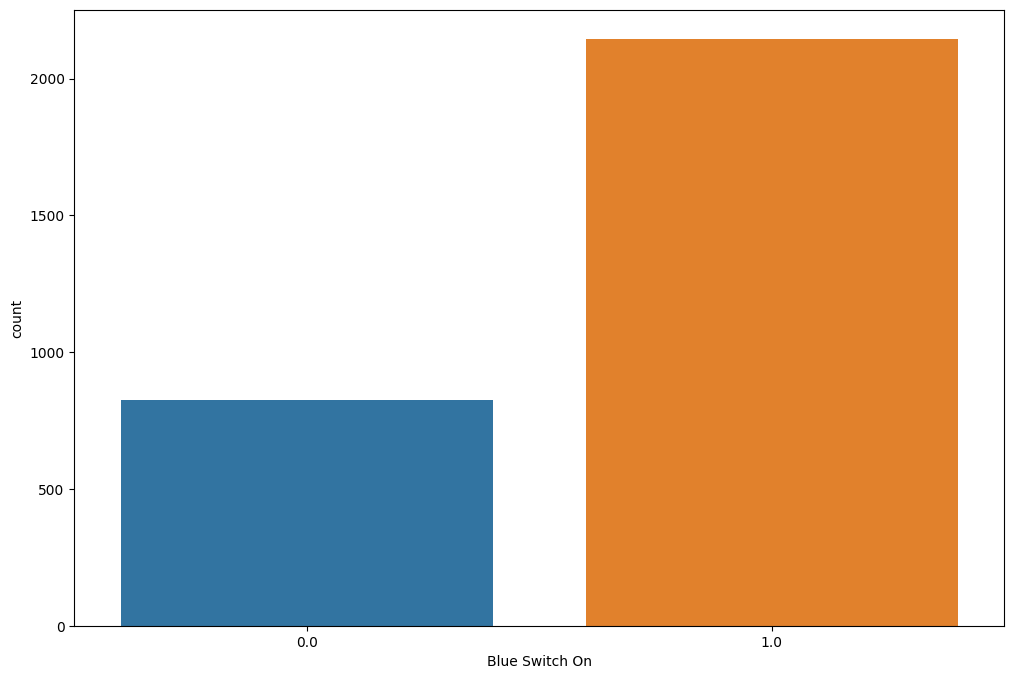

In [49]:
# First Start with 'Blue Switch On'
sns.countplot(x = new_df['Blue Switch On'])


In [50]:
# how about the effect of this feature on our target.
Ctable = pd.DataFrame(columns = ['Runs', 'Does not Run'], index = ['ON', 'OFF'])
Ctable['Runs'].iloc[0] = new_df[(new_df['Running'] == 1) & (new_df['Blue Switch On'] == 1)].shape[0]
Ctable['Does not Run'].iloc[0] = new_df[(new_df['Running'] == 0) & (new_df['Blue Switch On'] == 1)].shape[0]
Ctable['Runs'].iloc[1] = new_df[(new_df['Running'] == 1) & (new_df['Blue Switch On'] == 0)].shape[0]
Ctable['Does not Run'].iloc[1] = new_df[(new_df['Running'] == 0) & (new_df['Blue Switch On'] == 0)].shape[0]


In [51]:
Ctable

,Runs,Does not Run
ON,1486,659
OFF,0,827


<AxesSubplot: >

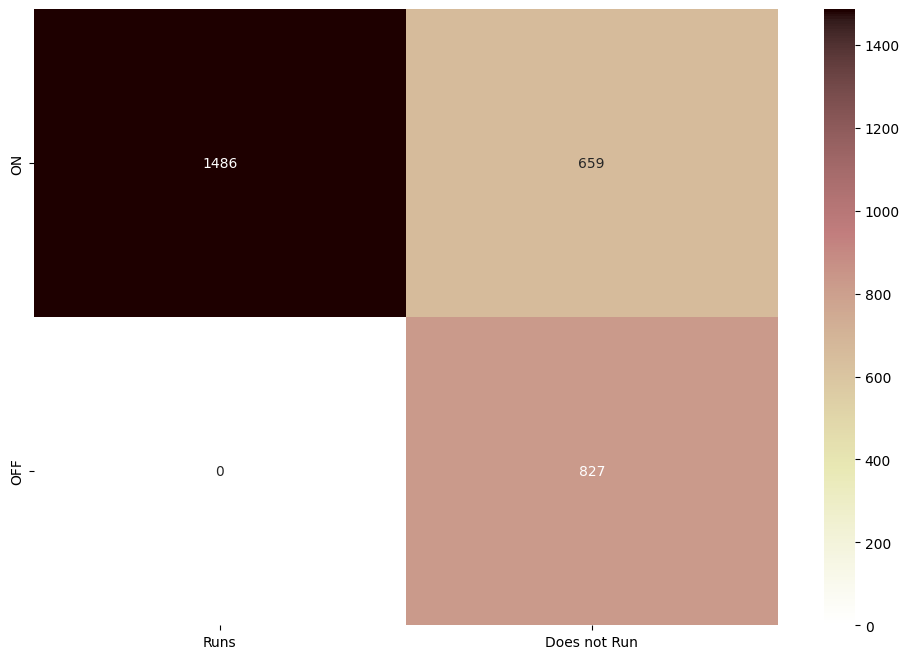

In [52]:
# The heatmap
sns.heatmap(Ctable.astype(int), annot = True, fmt = 'd', cmap = 'pink_r')

This is Good News. When the Blue Switch is Off, the Machine never Runs.

Since we have this observation, we are going to analyse the other two features in the case where the Blue Switch is On.

<AxesSubplot: xlabel='Running', ylabel='Controller lawngreen'>

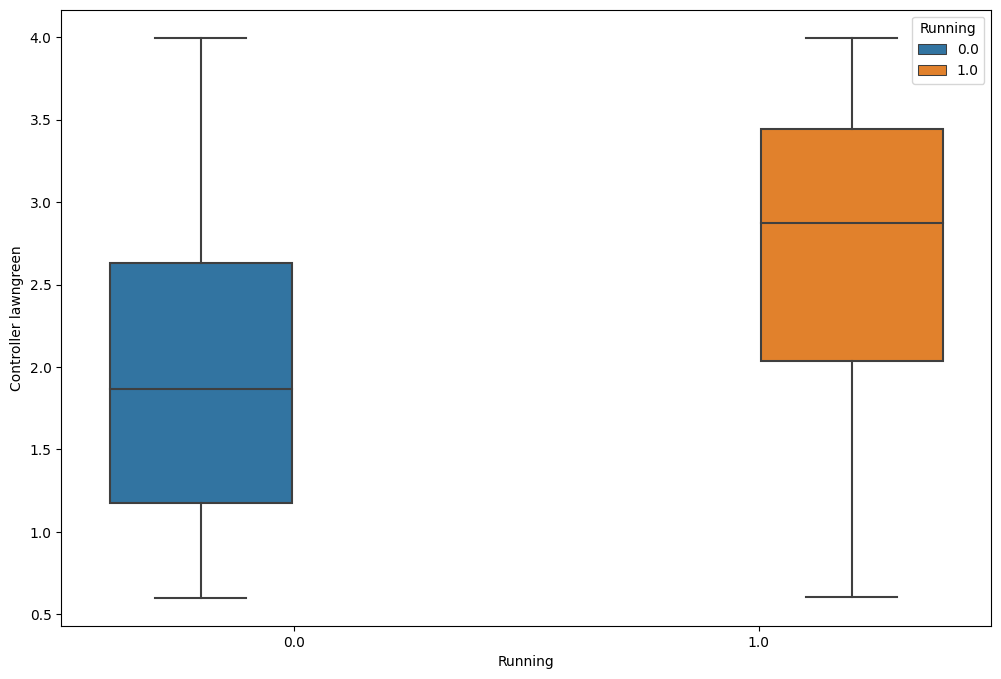

In [53]:
# Controller lawngreen
# let's look at the boxplot to see the ditribution of the two labels and ditect outliers.
data_BlueSwitchOn = new_df[new_df['Blue Switch On'] == 1]
sns.boxplot(data = data_BlueSwitchOn, x = 'Running', y = 'Controller lawngreen', hue = 'Running')

We can see a difference in the distribution of 'Controller lawngreen' between the two labels of our target.

<AxesSubplot: xlabel='Running', ylabel='Controller lemonchiffon'>

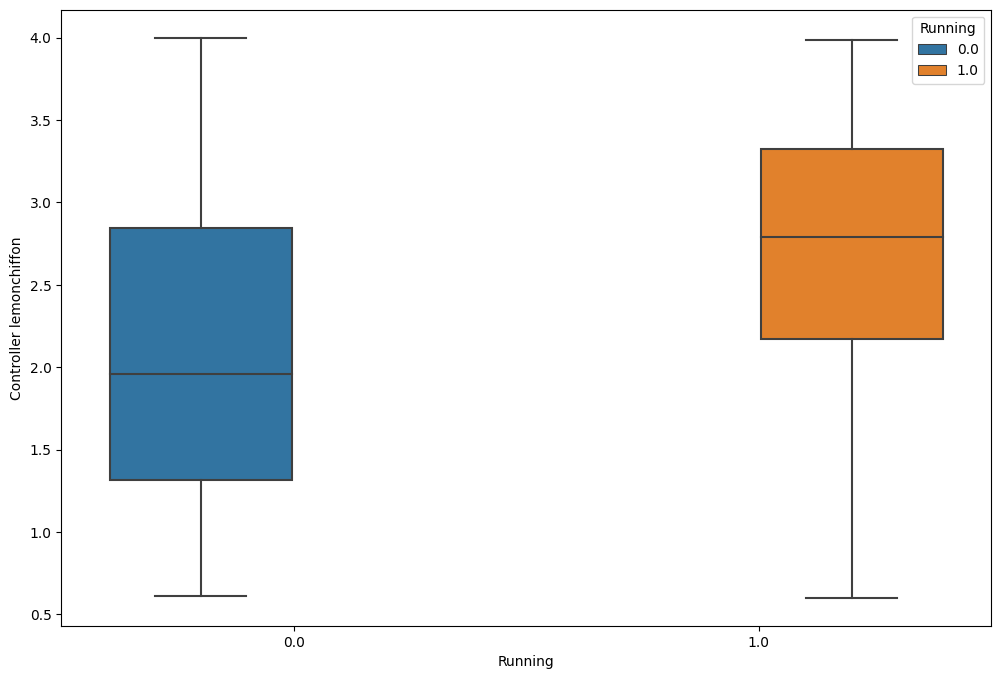

In [54]:
# Controller leminchiffon
sns.boxplot(data = data_BlueSwitchOn, x = 'Running', y = 'Controller lemonchiffon', hue = 'Running')

Same thing about 'Controller lemonchiffon'. How about there sum ?

<AxesSubplot: xlabel='Running'>

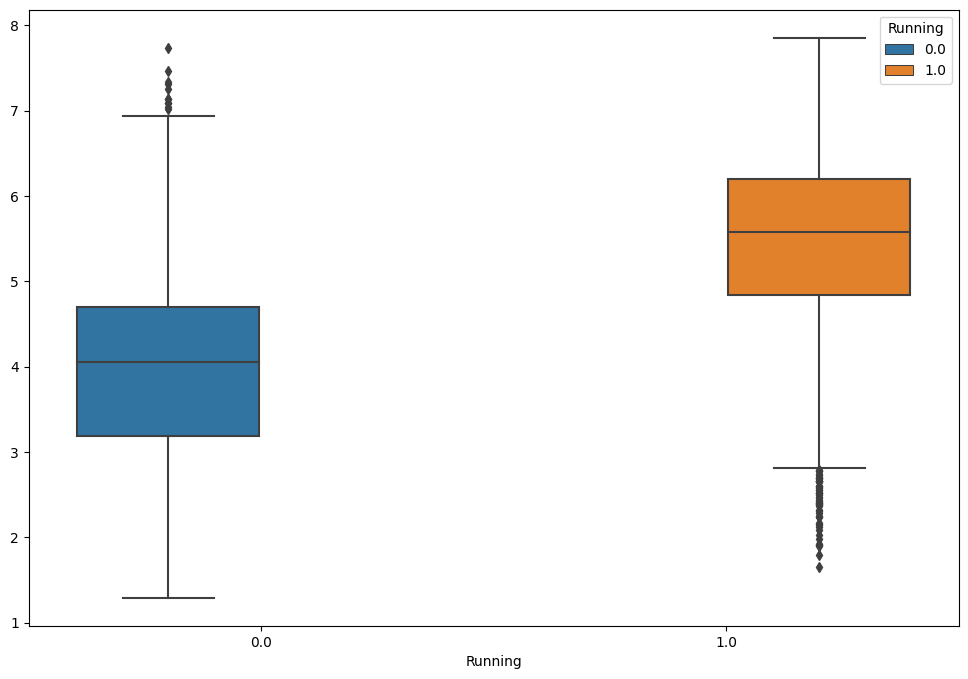

In [55]:
sns.boxplot(data = data_BlueSwitchOn, x = 'Running', y = data_BlueSwitchOn['Controller lawngreen'] + data_BlueSwitchOn['Controller lemonchiffon'],
            hue = 'Running')

Great. This tell us that there is a threshold value (around 4.7), that whenever the value of the sum is greater than the threshold the machine often runs.

We are going to use Feature Transformation to create a new feature 'Controller Sum' and then use the two observations from before to define our classifier.

In [64]:
# create 'Controller Sum' and remove outliers.
new_df['Controller Sum'] = new_df['Controller lemonchiffon'] + new_df['Controller lawngreen']
new_df.drop(index = new_df[(new_df['Controller lemonchiffon'] + new_df['Controller lawngreen'] > 7.6) & \
    (new_df['Running'] == 0)].index, inplace = True)
new_df.drop(index = new_df[(new_df['Controller lemonchiffon'] + new_df['Controller lawngreen'] < 3.5) & \
    (new_df['Running'] == 1)].index, inplace = True)
# we create the same feature in our test data
test_data['Controller Sum'] = test_data['Controller lemonchiffon'] + test_data['Controller lawngreen']

<AxesSubplot: xlabel='Running', ylabel='Controller Sum'>

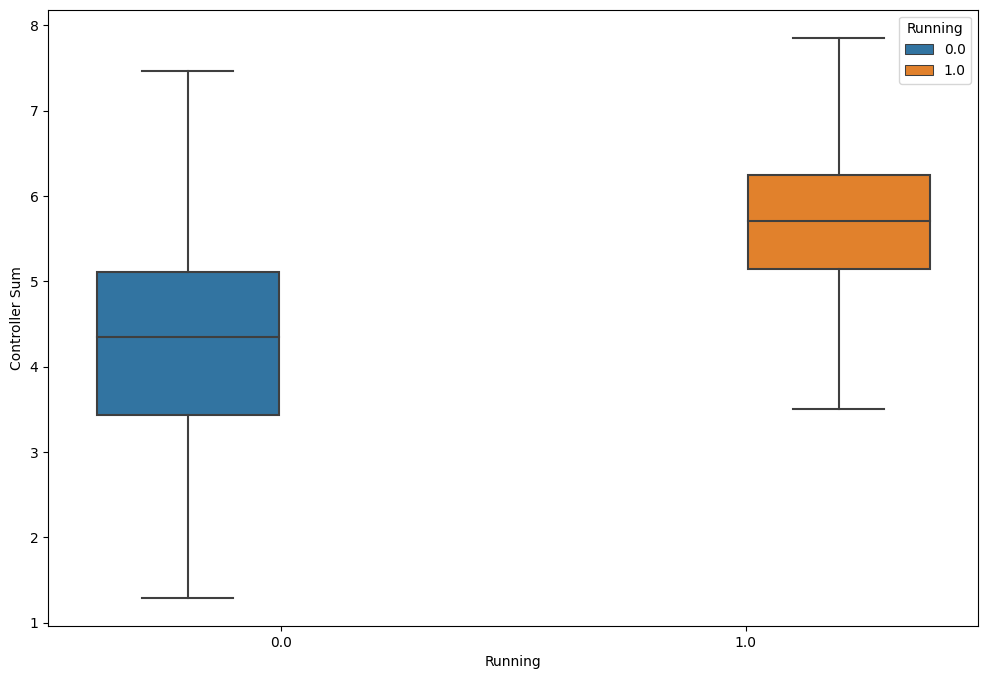

In [65]:
sns.boxplot(data = new_df, x = 'Running', y = 'Controller Sum', hue = 'Running')

In [66]:
new_df.shape

(2828, 101)

### Our Classifier

In [67]:
class Simple_Classifier:
    def __init__(self, Theta = None, iter = 100):
        self.Theta = Theta
        self.iter = iter
        
    def predict(self, X):
        if self.Theta == None:
            print('This DecisionTreeClassifier instance is not fitted yet.\nCall -fit- with appropriate arguments before using this estimator')
        else:
            return ((X['Blue Switch On'] == 1) & (X['Controller Sum'] > self.Theta)).astype(float).values # we return an array for compatibility with sklearn models
    
    
    def fit(self, X, y):
        bestErr = X.shape[0]
        threshold = np.linspace(X['Controller Sum'].min(), X['Controller Sum'].max(), self.iter)
        for self.Theta in threshold:
            err = (self.predict(X) != y).sum()
            if err < bestErr:
                bestErr = err
                best_Theta = self.Theta
        self.Theta = best_Theta
    
    
    def accuracy(self, pred, z):
        return (z == pred).sum()/z.shape[0]

    def get_params(self, deep):
        # to be compatability with sklearn
        return {'Theta': self.Theta, 
                'iter': self.iter}
                       

In [69]:
# Split the Data
X = new_df.drop(columns = ['Running'])
y = new_df['Running']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)

In [70]:
# fit the model
classifier = Simple_Classifier()
classifier.fit(X_train, y_train)

# predict
prediction = classifier.predict(X_valid)

# accuracy
print(classifier.accuracy(prediction, y_valid))

0.8704358068315665


# Model Selection

We have an accuracy of 0.87. Let us compare it to some of the classifiers from sklearn.

In [71]:
# import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold


In [72]:
r_s = 123
Classifiers = {'OurClassifier': Simple_Classifier(), 
              'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(r_s), 
              'RidgeClassifier': RidgeClassifier(r_s),
              'Bayes': GaussianNB(),
              'SGDClassifier': SGDClassifier(),
              'AdaBoostClassifier': AdaBoostClassifier(random_state = r_s),
              'SVMClassifier': SVC(),
              'KNeighborsClassifier': KNeighborsClassifier()}

In [73]:
cv = KFold(n_splits = 10, shuffle = True, random_state = r_s)
score = [cross_val_score(col, X, y, cv = cv, scoring = 'accuracy').mean() for col in\
    Classifiers.values()]
score_table = pd.DataFrame(score, index = Classifiers.keys(), columns = ['Mean cv Score'])

In [74]:
score_table

,Mean cv Score
OurClassifier,0.871300
DecisionTreeClassifier,0.911954
RandomForestClassifier,0.943782
RidgeClassifier,0.876950
Bayes,0.793831
SGDClassifier,0.817829
AdaBoostClassifier,0.907352
SVMClassifier,0.791740
KNeighborsClassifier,0.486915


Our Model has an accuracy of 0.87. There are three models that surpassed it: DecisionTreeClassifier, AdaBoostClassifier and RandomForestClassifier, we are going use stack three models together to have our final model.

# Model Stacking

First we do some hyperparameter tunning.

In [75]:
n = np.arange(1, 100, 4)
Models = {'RandomForestClassifier': (RandomForestClassifier(random_state = r_s), {'n_estimators': n}),
          'AdaBoostClassifier': (AdaBoostClassifier(random_state = r_s), {'n_estimators': n}),
          'DecisionTreeClassifier': (DecisionTreeClassifier(), {'min_samples_leaf': n})}

from sklearn.model_selection import GridSearchCV


BestModels = []
score = []
for name, (cl, param) in Models.items():
    grid = GridSearchCV(cl, param, cv = cv)
    grid.fit(X,y)
    score.append(grid.best_score_)
    BestModels.append((name, grid.best_estimator_))

score_table = pd.DataFrame(score, index = [col for col in Models.keys()], columns = ['Mean cv Score'])

In [76]:
score_table

,Mean cv Score
RandomForestClassifier,0.940962
AdaBoostClassifier,0.923271
DecisionTreeClassifier,0.927865


we use the StackingClassifier method from sklearn with final estimator being LogisticRegression and base models to be our three models.

In [77]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

FinalModel = StackingClassifier(estimators = BestModels, final_estimator = LogisticRegression())

print('The mean CV Score', cross_val_score(FinalModel, X, y, cv = cv, scoring = 'accuracy').mean())


The mean CV Score 0.9427198456256424


# Predictions

In [79]:
X_test = test_data.drop(columns = ['Running'])
# fit the model
FinalModel = FinalModel.fit(X, y)

# predict
predictedLabels = FinalModel.predict(X_test)
np.savetxt("TheFisherMan.csv", predictedLabels, delimiter=",")

Thank you.